https://mp.weixin.qq.com/s/bpYVd2IAGqnjfXnKllfWWw

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import models,layers

In [36]:
df = pd.read_csv('../../dataset/titanic/train.csv')

In [37]:
df.shape

(891, 12)

In [38]:
dftrain_raw = df.loc[:500,:]
dftrain_test = df.loc[501:,:]

In [41]:
dftrain_raw.shape
dftrain_test.shape

(501, 12)

(390, 12)

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Age')

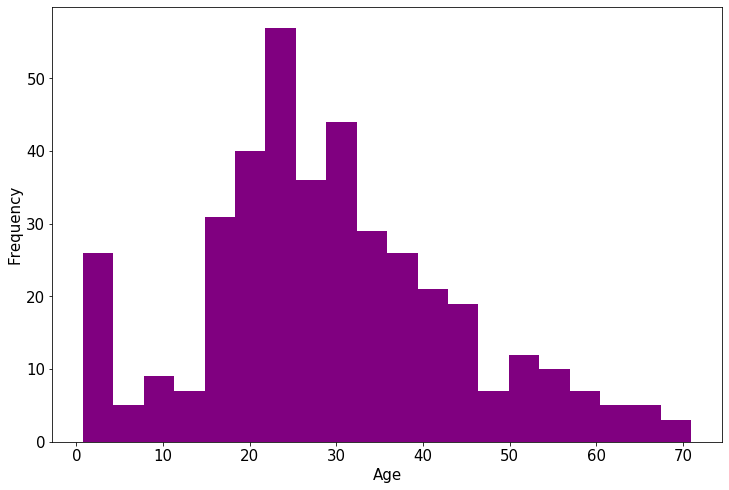

In [42]:
# 年龄分布情况
%matplotlib inline
%config InlineBackend.figure_format = 'png' # 此方法将会使图片以矢量图的形式显示
ax = dftrain_raw['Age'].plot(kind='hist',bins=20,color='purple',figsize=(12,8),fontsize=15)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

Text(0, 0.5, 'Density')

Text(0.5, 0, 'Age')

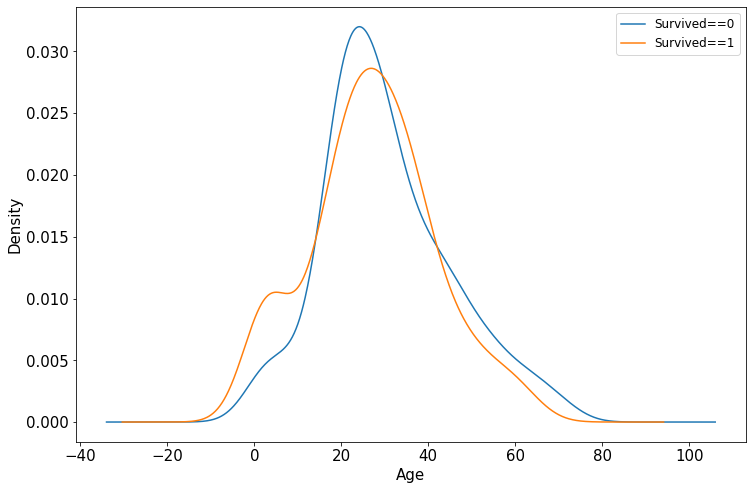

In [43]:
# 年龄和label的相关性
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw.query('Survived == 0')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
dftrain_raw.query('Survived == 1')['Age'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['Survived==0','Survived==1'],fontsize = 12)
ax.set_ylabel('Density',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)
plt.show()

In [44]:
def preprocessing(dfdata):
    
    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)
    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)


In [48]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)
y_test = dftrain_test['Survived'].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

x_train.shape = (501, 15)
x_test.shape = (418, 15)


In [ ]:
# 定义模型
tf.keras.backend.clear_session()
